In [1]:
import pandas as pd
import math
import keras
from keras.layers import Dense,Embedding, Flatten, Conv1D, GlobalMaxPooling1D, LSTM, Bidirectional, Dropout
from keras.preprocessing.text import text_to_word_sequence,Tokenizer
from keras.preprocessing.sequence import pad_sequences

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_pickle("./cryptic_dataset/combined_fifteen_times_final_filtered.pickle")

In [3]:
anagram_df = df[
    df.is_anagram &
    ~df.is_homophone &
    ~df.is_double &
    ~df.is_cryptic & 
    ~df.is_contain & 
    ~df.is_reverse & 
    ~df.is_alternate &
    ~df.is_init & 
    ~df.is_delete & 
    ~df.is_charade & 
    ~df['is_&lit'] & 
    ~df.is_hidden & 
    ~df.is_spoonerism & 
    ~df.is_palindrome
]

In [121]:
homophone_df = df[
    ~df.is_anagram &
    df.is_homophone &
    ~df.is_double &
    ~df.is_cryptic & 
    ~df.is_contain & 
    ~df.is_reverse & 
    ~df.is_alternate &
    ~df.is_init & 
    ~df.is_delete & 
    ~df.is_charade & 
    ~df['is_&lit'] & 
    ~df.is_hidden & 
    ~df.is_spoonerism & 
    ~df.is_palindrome
]

In [122]:
double_df = df[
    ~df.is_anagram &
    ~df.is_homophone &
    df.is_double &
    ~df.is_cryptic & 
    ~df.is_contain & 
    ~df.is_reverse & 
    ~df.is_alternate &
    ~df.is_init & 
    ~df.is_delete & 
    ~df.is_charade & 
    ~df['is_&lit'] & 
    ~df.is_hidden & 
    ~df.is_spoonerism & 
    ~df.is_palindrome
]

In [123]:
cryptic_df = df[
    ~df.is_anagram &
    ~df.is_homophone &
    ~df.is_double &
    df.is_cryptic & 
    ~df.is_contain & 
    ~df.is_reverse & 
    ~df.is_alternate &
    ~df.is_init & 
    ~df.is_delete & 
    ~df.is_charade & 
    ~df['is_&lit'] & 
    ~df.is_hidden & 
    ~df.is_spoonerism & 
    ~df.is_palindrome
]

In [124]:
contain_df = df[
    ~df.is_anagram &
    ~df.is_homophone &
    ~df.is_double &
    ~df.is_cryptic & 
    df.is_contain & 
    ~df.is_reverse & 
    ~df.is_alternate &
    ~df.is_init & 
    ~df.is_delete & 
    ~df.is_charade & 
    ~df['is_&lit'] & 
    ~df.is_hidden & 
    ~df.is_spoonerism & 
    ~df.is_palindrome
]

In [125]:
reverse_df = df[
    ~df.is_anagram &
    ~df.is_homophone &
    ~df.is_double &
    ~df.is_cryptic & 
    ~df.is_contain & 
    df.is_reverse & 
    ~df.is_alternate &
    ~df.is_init & 
    ~df.is_delete & 
    ~df.is_charade & 
    ~df['is_&lit'] & 
    ~df.is_hidden & 
    ~df.is_spoonerism & 
    ~df.is_palindrome
]

In [126]:
alternate_df = df[
    ~df.is_anagram &
    ~df.is_homophone &
    ~df.is_double &
    ~df.is_cryptic & 
    ~df.is_contain & 
    ~df.is_reverse & 
    df.is_alternate &
    ~df.is_init & 
    ~df.is_delete & 
    ~df.is_charade & 
    ~df['is_&lit'] & 
    ~df.is_hidden & 
    ~df.is_spoonerism & 
    ~df.is_palindrome
]

In [127]:
init_df = df[
    ~df.is_anagram &
    ~df.is_homophone &
    ~df.is_double &
    ~df.is_cryptic & 
    ~df.is_contain & 
    ~df.is_reverse & 
    ~df.is_alternate &
    df.is_init & 
    ~df.is_delete & 
    ~df.is_charade & 
    ~df['is_&lit'] & 
    ~df.is_hidden & 
    ~df.is_spoonerism & 
    ~df.is_palindrome
]

In [128]:
delete_df = df[
    ~df.is_anagram &
    ~df.is_homophone &
    ~df.is_double &
    ~df.is_cryptic & 
    ~df.is_contain & 
    ~df.is_reverse & 
    ~df.is_alternate &
    ~df.is_init & 
    df.is_delete & 
    ~df.is_charade & 
    ~df['is_&lit'] & 
    ~df.is_hidden & 
    ~df.is_spoonerism & 
    ~df.is_palindrome
]

In [129]:
charade_df = df[
    ~df.is_anagram &
    ~df.is_homophone &
    ~df.is_double &
    ~df.is_cryptic & 
    ~df.is_contain & 
    ~df.is_reverse & 
    ~df.is_alternate &
    ~df.is_init & 
    ~df.is_delete & 
    df.is_charade & 
    ~df['is_&lit'] & 
    ~df.is_hidden & 
    ~df.is_spoonerism & 
    ~df.is_palindrome
]

In [130]:
lit_df = df[
    ~df.is_anagram &
    ~df.is_homophone &
    ~df.is_double &
    ~df.is_cryptic & 
    ~df.is_contain & 
    ~df.is_reverse & 
    ~df.is_alternate &
    ~df.is_init & 
    ~df.is_delete & 
    ~df.is_charade & 
    df['is_&lit'] & 
    ~df.is_hidden & 
    ~df.is_spoonerism & 
    ~df.is_palindrome
]

In [131]:
hidden_df = df[
    ~df.is_anagram &
    ~df.is_homophone &
    ~df.is_double &
    ~df.is_cryptic & 
    ~df.is_contain & 
    ~df.is_reverse & 
    ~df.is_alternate &
    ~df.is_init & 
    ~df.is_delete & 
    ~df.is_charade & 
    ~df['is_&lit'] & 
    df.is_hidden & 
    ~df.is_spoonerism & 
    ~df.is_palindrome
]

In [132]:
spoonerism_df = df[
    ~df.is_anagram &
    ~df.is_homophone &
    ~df.is_double &
    ~df.is_cryptic & 
    ~df.is_contain & 
    ~df.is_reverse & 
    ~df.is_alternate &
    ~df.is_init & 
    ~df.is_delete & 
    ~df.is_charade & 
    ~df['is_&lit'] & 
    ~df.is_hidden & 
    df.is_spoonerism & 
    ~df.is_palindrome
]

In [133]:
palindrome_df = df[
    ~df.is_anagram &
    ~df.is_homophone &
    ~df.is_double &
    ~df.is_cryptic & 
    ~df.is_contain & 
    ~df.is_reverse & 
    ~df.is_alternate &
    ~df.is_init & 
    ~df.is_delete & 
    ~df.is_charade & 
    ~df['is_&lit'] & 
    ~df.is_hidden & 
    ~df.is_spoonerism & 
    df.is_palindrome
]

In [134]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df.clue.tolist())

In [135]:
cc_types_dfs = [anagram_df,homophone_df,double_df,cryptic_df,contain_df,reverse_df,alternate_df,init_df,delete_df,charade_df,lit_df,hidden_df,spoonerism_df,palindrome_df]

In [136]:
cc_types = 'is_anagram	is_homophone	is_double	is_cryptic	is_contain	is_reverse	is_alternate	is_init	is_delete	is_charade	is_&lit	is_hidden	is_spoonerism	is_palindrome'.split('	')

In [137]:
for df,cc_type in zip(cc_types_dfs,cc_types):
    df['category'] = cc_type

In [138]:
def get_input_val_test(df):
    length = len(df)
    input_len = math.floor(length*0.7)
    val_len  = math.floor(length*0.2)
    test_len = math.floor(length*0.1)
    input_df = df[:input_len]
    val_df = df[input_len:input_len+val_len]
    test_df = df[input_len+val_len:]
    return input_df,val_df,test_df

In [139]:
input_cc_types_df = pd.concat([get_input_val_test(df)[0] for df in cc_types_dfs]).sample(frac=1)
val_cc_types_df = pd.concat([get_input_val_test(df)[1] for df in cc_types_dfs]).sample(frac=1)
test_cc_types_df = pd.concat([get_input_val_test(df)[2] for df in cc_types_dfs]).sample(frac=1)

In [140]:
max_size = input_cc_types_df.groupby('category').count().max()[0]

In [141]:
lst = [input_cc_types_df]
for class_index, group in input_cc_types_df.groupby('category'):
    sample = group.sample(max_size-len(group), replace=True, )
    lst.append(sample)
upsampled_input_cc_types_df = pd.concat(lst)

In [142]:
cc_input_df = upsampled_input_cc_types_df.drop('category',axis=1)
cc_val_df = val_cc_types_df.drop('category',axis=1).drop_duplicates()
cc_test_df = test_cc_types_df.drop('category',axis=1).drop_duplicates()

In [143]:
cc_input_data = pad_sequences(tokenizer.texts_to_sequences(cc_input_df.clue.tolist()),maxlen=15)
cc_val_data = pad_sequences(tokenizer.texts_to_sequences(cc_val_df.clue.tolist()),maxlen=15)
cc_test_data = pad_sequences(tokenizer.texts_to_sequences(cc_test_df.clue.tolist()),maxlen=15)

In [144]:
cc_input_data_out = cc_input_df[cc_input_df.columns[2:]] * 1
cc_val_data_out = cc_val_df[cc_val_df.columns[2:]] * 1
cc_test_data_out = cc_test_df[cc_test_df.columns[2:]] * 1

In [145]:
model = keras.Sequential()
model.add(Embedding(len(tokenizer.index_word)+1, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(14, activation='sigmoid'))

In [116]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['categorical_accuracy'])

In [117]:
history = model.fit(cc_input_data,cc_input_data_out ,validation_data=(cc_val_data,cc_val_data_out), batch_size=32, epochs=10)

Train on 149842 samples, validate on 3833 samples
Epoch 1/10
  6048/149842 [>.............................] - ETA: 4:11 - loss: 0.2643 - categorical_accuracy: 0.1151

KeyboardInterrupt: 

In [60]:
model.evaluate(x=cc_test_data, y=cc_test_data_out, batch_size=None, verbose=1, sample_weight=None, steps=None)

510/510 [==============================] - 0s 255us/step


[0.2566366582524543, 0.1333333335378591]

In [79]:
model = keras.Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(len(tokenizer.index_word)+1,50,input_length=15))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(64, 10,padding='valid', activation='relu', strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(250,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(14, activation='sigmoid'))

In [80]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['categorical_accuracy'])

In [81]:
history = model.fit(cc_input_data,cc_input_data_out ,validation_data=(cc_val_data,cc_val_data_out), batch_size=128, epochs=6)

Train on 149842 samples, validate on 3833 samples
Epoch 1/6
149842/149842 [==============================] - 7s 44us/step - loss: 0.2313 - categorical_accuracy: 0.2141 - val_loss: 0.2445 - val_categorical_accuracy: 0.0744
Epoch 2/6
149842/149842 [==============================] - 6s 43us/step - loss: 0.2087 - categorical_accuracy: 0.3124 - val_loss: 0.2481 - val_categorical_accuracy: 0.0741
Epoch 3/6
149842/149842 [==============================] - 6s 42us/step - loss: 0.2002 - categorical_accuracy: 0.3410 - val_loss: 0.2483 - val_categorical_accuracy: 0.0918
Epoch 4/6
149842/149842 [==============================] - 6s 39us/step - loss: 0.1955 - categorical_accuracy: 0.3582 - val_loss: 0.2490 - val_categorical_accuracy: 0.0822
Epoch 5/6
149842/149842 [==============================] - 6s 40us/step - loss: 0.1923 - categorical_accuracy: 0.3679 - val_loss: 0.2520 - val_categorical_accuracy: 0.0843
Epoch 6/6
149842/149842 [==============================] - 6s 40us/step - loss: 0.1901 - c

In [45]:
model = keras.Sequential()
model.add(Embedding(len(tokenizer.index_word)+1, 128))
model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(14, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['categorical_accuracy'])

In [46]:
filepath="1xBilstm-{epoch:02d}-{val_loss:.2f}-{val_categorical_accuracy:.2f}-singlelabel.hdf5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)
callbacks_list = [checkpoint]

In [47]:
history = model.fit(cc_input_data,cc_input_data_out ,validation_data=(cc_val_data,cc_val_data_out), batch_size=128, epochs=16, callbacks=callbacks_list)

Train on 149842 samples, validate on 3833 samples
Epoch 1/16
149842/149842 [==============================] - 69s 458us/step - loss: 0.2278 - categorical_accuracy: 0.2305 - val_loss: 0.2482 - val_categorical_accuracy: 0.0764

Epoch 00001: saving model to 1xBilstm-01-0.25-0.08-singlelabel.hdf5
Epoch 2/16
149842/149842 [==============================] - 66s 443us/step - loss: 0.2131 - categorical_accuracy: 0.2964 - val_loss: 0.2412 - val_categorical_accuracy: 0.1135

Epoch 00002: saving model to 1xBilstm-02-0.24-0.11-singlelabel.hdf5
Epoch 3/16
149842/149842 [==============================] - 68s 456us/step - loss: 0.2044 - categorical_accuracy: 0.3277 - val_loss: 0.2520 - val_categorical_accuracy: 0.0897

Epoch 00003: saving model to 1xBilstm-03-0.25-0.09-singlelabel.hdf5
Epoch 4/16
149842/149842 [==============================] - 68s 457us/step - loss: 0.1982 - categorical_accuracy: 0.3500 - val_loss: 0.2533 - val_categorical_accuracy: 0.0871

Epoch 00004: saving model to 1xBilstm-04-0

In [146]:
model = keras.Sequential()
model.add(Embedding(36172, 256))
model.add(Bidirectional(LSTM(256, dropout=0.5, recurrent_dropout=0.5)))
model.add(Dense(14, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['categorical_accuracy'])

In [147]:
model.load_weights("1xBilstm-97-0.89-0.44-singlelabel.hdf5")

In [219]:
pred = model.predict_classes(cc_val_data)

In [220]:
def class_to_bin(cls):
    bn = [0]*14
    bn[cls] = 1
    return bn

In [221]:
from sklearn.metrics import confusion_matrix

In [222]:
import numpy as np

In [224]:
matrix = cc_val_data_out.astype(int).as_matrix()

In [225]:
pred_actual = [np.where(r==1)[0][0] for r in matrix]

In [226]:
cnf_matrix = confusion_matrix(pred,pred_actual)

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[ 404   16   15   39    6   20    0   14    8  244    7   25    0    1]
 [   6   69    1    6    0    1    0    0    0   19    0    0    0    0]
 [   1    0    1    1    0    1    0    0    0    7    0    1    0    0]
 [   4    3    7   43    0    2    0    0    0   23    1    1    0    0]
 [  50   12    7   20   45   10    0   13   10  204    2   23    0    0]
 [  12    0    1    5    1   26    0    0    1   57    2    3    0    5]
 [   1    0    0    0    0    0    5    0    1    4    0    0    0    0]
 [   3    0    1    1    1    0    0    5    2   19    0    0    0    0]
 [ 104   14   13   35    4   18    0   22   32  308    4   39    0    0]
 [ 196   56   48   93    5   36    0   44   31 1007   13   70    1    2]
 [   1    0    0    2    0    1    0    1    0    1    0    0    0    0]
 [   9    2    3    7    0    0    0    1    0   19    1   18    0    0]
 [   0    0    0   

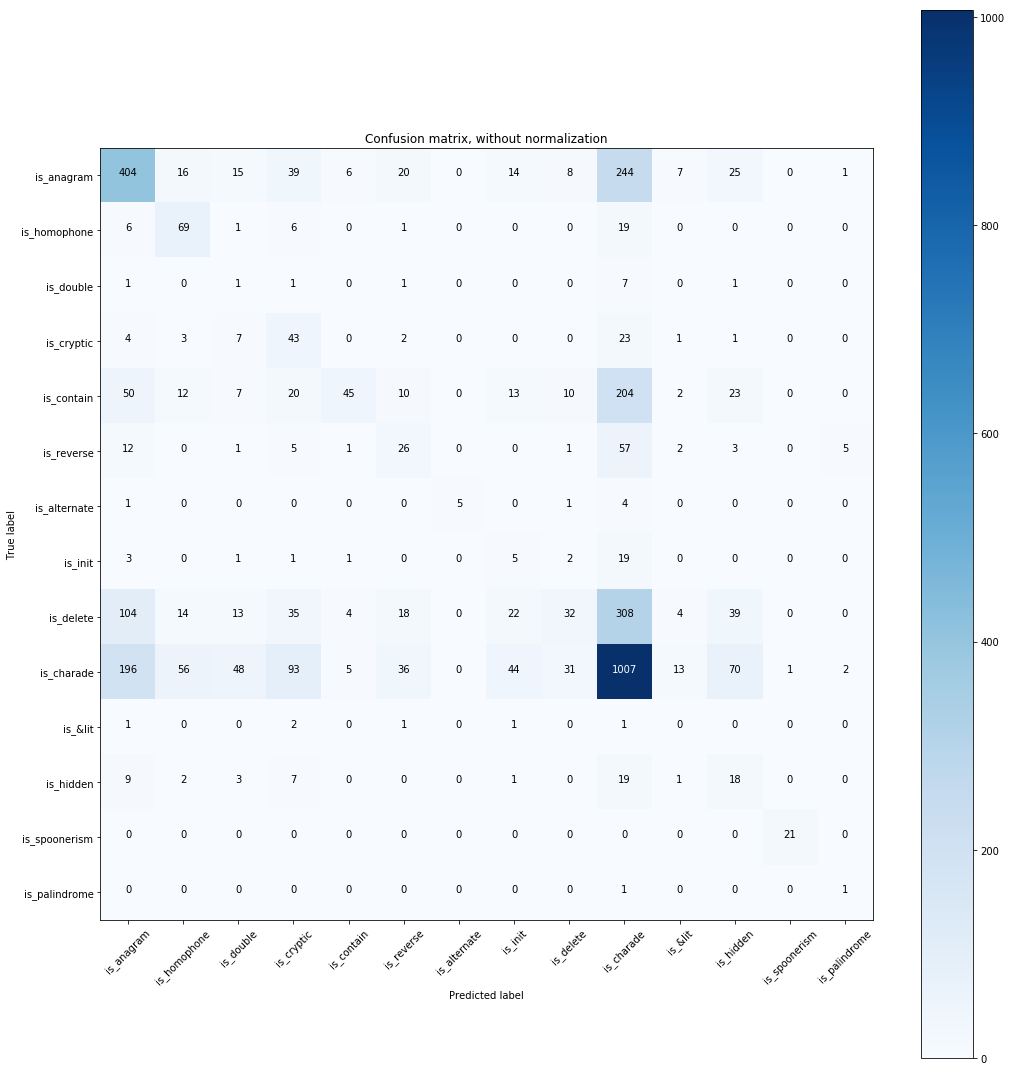

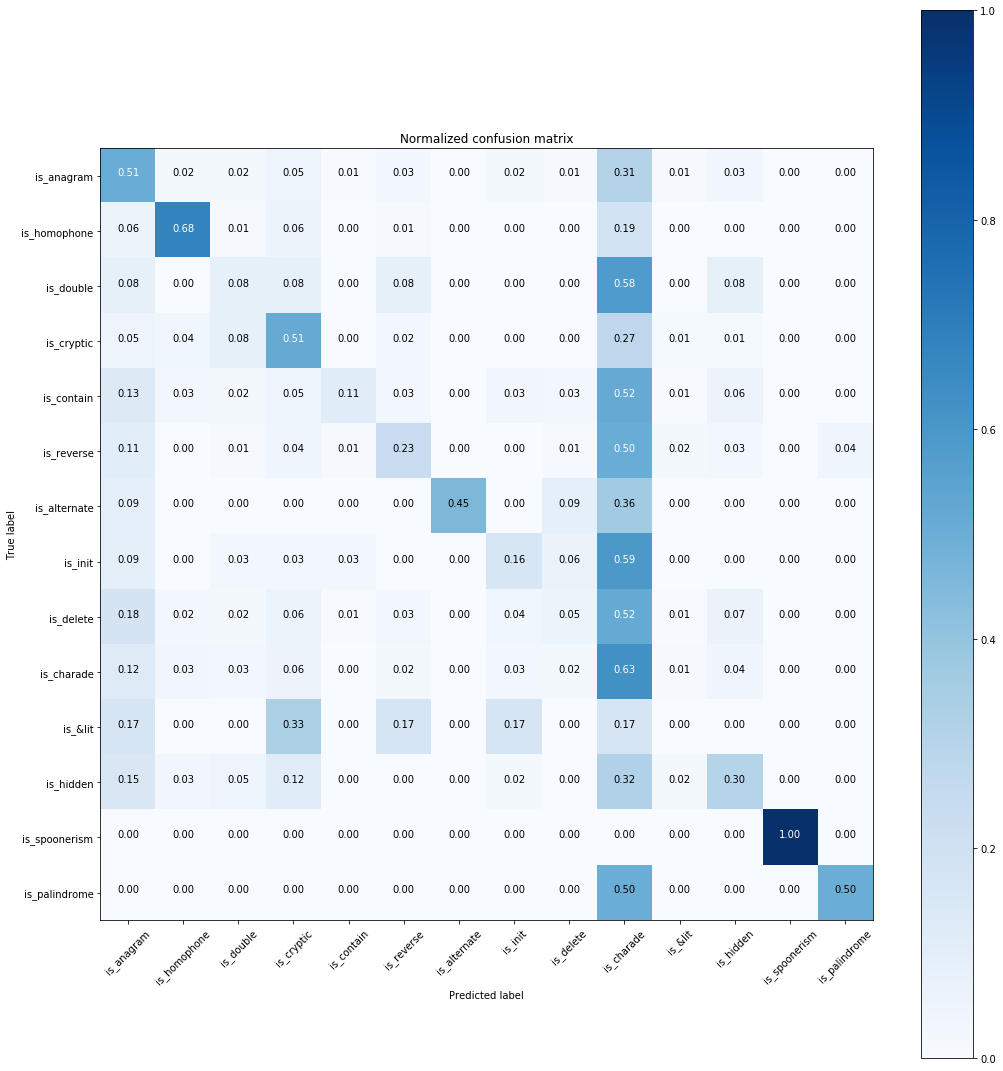

In [227]:
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
np.set_printoptions(precision=2)
class_names = cc_types
# Plot non-normalized confusion matrix
plt.figure(figsize=(15,15))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(15,15))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()